In [ ]:
#train - https://drive.google.com/file/d/1WfUB2bzyS4EiF65qfcU5kbSMXrs7cz9s/view?usp=sharing
#test - https://drive.google.com/file/d/1todHGICO2eSBLhZYbmljEMtxBp9zpJ1B/view?usp=sharing

# Imports

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Load the Data

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/SideBoys/sem 7/AIHC/drugsComTrain_raw.csv')
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


# Preprocessing

In [ ]:
# Remove duplicates
df = df.drop_duplicates()

# Handle missing values if any
df = df.dropna()

# Text cleaning
stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)

df["cleaned_review"] = df["review"].apply(clean_text)

In [ ]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,cleaned_review,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,side effect take combin bystol 5 mg fish oil,Neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,son halfway fourth week intuniv becam concern ...,Positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,use take anoth oral contracept 21 pill cycl li...,Positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,first time use form birth control 039 glad wen...,Positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,suboxon complet turn life around feel healthie...,Positive


# Exploratory Data Analysis (EDA)

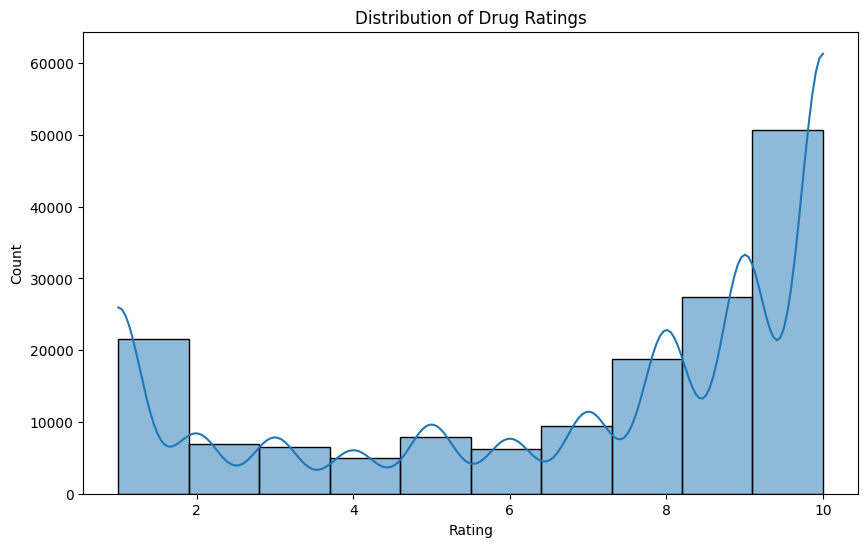

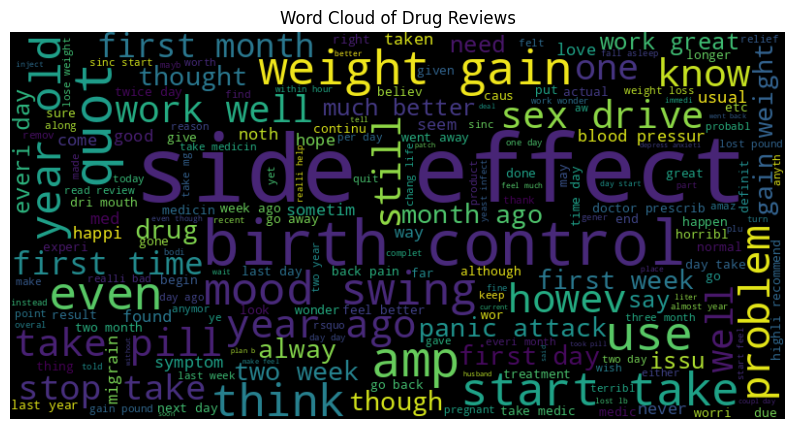

In [ ]:
# Generate summary statistics
summary_stats = df.describe()

# Visualize drug ratings
plt.figure(figsize=(10, 6))
sns.histplot(df["rating"], bins=10, kde=True)
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Generate word frequency plot
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(" ".join(df["cleaned_review"]))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Drug Reviews")
plt.show()

# Sentiment Analysis



In [ ]:
from textblob import TextBlob

def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["cleaned_review"].apply(get_sentiment)

# Calculate sentiment trends over time
df["date"] = pd.to_datetime(df["date"])
sentiment_over_time = df.groupby(df["date"].dt.year)["sentiment"].value_counts().unstack().fillna(0)


# Text Mining and Feature Extraction

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df["cleaned_review"])

# Machine Learning Models


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df["sentiment"], test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Performance:
Accuracy: 0.6525872817955112
Precision: 0.7533290929215211
Recall: 0.6525872817955112
F1 Score: 0.5420630300069711

Classification Report:
              precision    recall  f1-score   support

    Negative       0.97      0.11      0.19      8555
     Neutral       0.85      0.02      0.03      3546
    Positive       0.64      1.00      0.78     19979

    accuracy                           0.65     32080
   macro avg       0.82      0.37      0.34     32080
weighted avg       0.75      0.65      0.54     32080



# Data Visualization


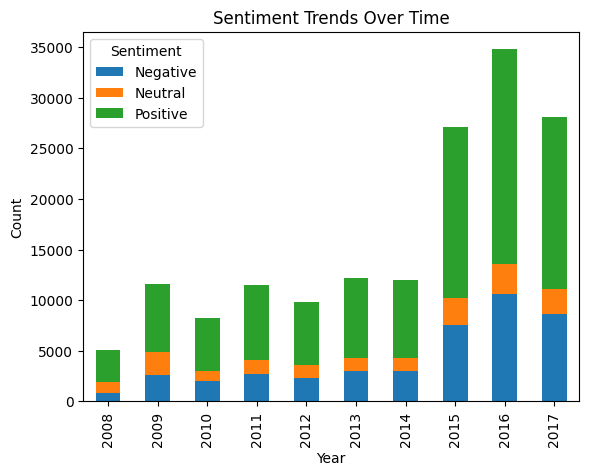

In [ ]:
# Visualize sentiment trends over time
sentiment_over_time.plot(kind="bar", stacked=True)
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()